# Task:1 Linear Regression (The Sparks Foundation)

## Simple Linear Regression to Predict Score of Student

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author :=> Padam Rai

In [2]:
# Importing important libraries for our model
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading dataset
df = pd.read_csv(r"C:\Users\preet\Desktop\The Sparks Foundation Internship\student_scores.csv")
print("Data Imported Successfully")
df.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Statistics

In [5]:
#checking size of the dataset
df.shape

(25, 2)

In [6]:
#Checking statistics of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

## Data Visualization

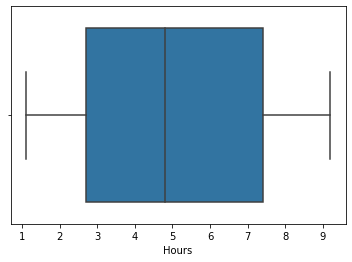

In [9]:
#Using boxplot => Hours
import seaborn as sns
sns.boxplot(df['Hours'])
plt.show()

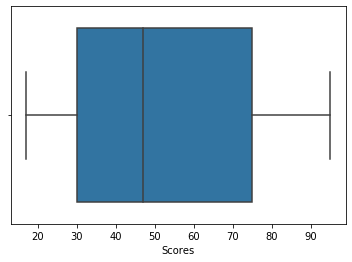

In [11]:
#Using boxplot => Scores
sns.boxplot(df['Scores'])
plt.show()

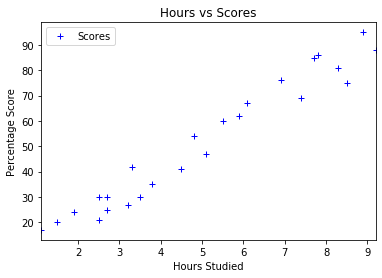

In [12]:
#Plotting Scatter plot
df.plot(x='Hours', y='Scores', color='blue', style='+')
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In the above figure we can clearly see that it is positive relation between Hours vs Score

### Preparing the data for  the training model

In [13]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

### Training Data by using LinearRegression Algorithm

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Checking intercept value
lr.intercept_

3.0980408893375113

In [18]:
#Checking coefficient value for the data
lr.coef_

array([9.60498629])

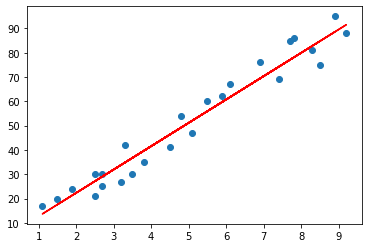

In [19]:
#Plotting the regression line
line = lr.coef_ * X + lr.intercept_
plt.scatter(X, Y)
plt.plot(X, line, color='red')
plt.show()

In [20]:
#Making prediction of the model after training
yhat = lr.predict(X_test)
yhat

array([74.17493942, 61.68845724, 33.83399701, 77.0564353 , 49.20197507])

In [21]:
X_test

array([[7.4],
       [6.1],
       [3.2],
       [7.7],
       [4.8]])

In [22]:
#Comparing actual vs Predicted value
df_compare = pd.DataFrame({"Actaul Value":y_test, "Predicted Value":yhat})
df_compare

,Actaul Value,Predicted Value
0,69,74.174939
1,67,61.688457
2,27,33.833997
3,85,77.056435
4,54,49.201975


In [24]:
# Now testing our model with user data
hours = 9.25
user_predict = lr.predict([[9.25]])
print("No: of Hours Studied = ", hours)
print("Predicted Value = ", user_predict[0])

No: of Hours Studied =  9.25
Predicted Value =  91.94416404722054


In [25]:
#Evaluation of the Model
print(lr.score(X_test, y_test))

0.9000546706590146
